# CNN 관련 자료
- https://tensorspace.org/

# 01. 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 데이터 전처리 --> 정규화 (Normalization)

x_train_scaled = x_train / 255.0 # 0~255 --> 0~1로 값을 정규화 시킴
x_test_scaled = x_test / 255.0

In [4]:
# 과대적합 문제를 회피/해결하기 위해서
# 검증용 데이터셋(Validation Dataset)을 준비하자!
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(
    x_train_scaled, y_train, test_size=0.2, random_state=42)

In [5]:
print(x_train_scaled.shape)
print(x_val_scaled.shape)
print(x_test_scaled.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)


In [6]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1) # -1은 컴퓨터 스스로 장수 넣기
x_val_scaled = x_val_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

In [7]:
print(x_train_scaled.shape)
print(x_val_scaled.shape)
print(x_test_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# 모델 만들기

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu', padding='same',
                             input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3),
                             activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2)))

model.add(keras.layers.Flatten()) # 3D 배열을 1D 배열로 펼쳐줌!
          
model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dropout(0.3))
# 층 전체 뉴런의 30%를 무작위로 선택해서, 학습시키지 않음!!
          
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [10]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 03. 모델 컴파일과 학습

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [12]:
# callback (콜백)
cb1 = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

cb2 =  keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 2번까지 변함이 없으면,가장 좋았었던 가중치복구 

In [13]:
h = model.fit(x_train_scaled, y_train, epochs=100, verbose=1,
         validation_data=(x_val_scaled, y_val),
         callbacks=[cb1, cb2])

Epoch 1/100
1500/1500 [==============================] - 80s 53ms/step - loss: 0.4936 - accuracy: 0.8215 - val_loss: 0.3200 - val_accuracy: 0.8842
Epoch 2/100
   3/1500 [..............................] - ETA: 43s - loss: 0.2216 - accuracy: 0.9583 

C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 82s 55ms/step - loss: 0.3274 - accuracy: 0.8820 - val_loss: 0.2777 - val_accuracy: 0.8932
Epoch 3/100
1500/1500 [==============================] - 86s 57ms/step - loss: 0.2794 - accuracy: 0.8983 - val_loss: 0.2503 - val_accuracy: 0.9089
Epoch 4/100
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2506 - accuracy: 0.9089 - val_loss: 0.2335 - val_accuracy: 0.9143
Epoch 5/100
1500/1500 [==============================] - 83s 55ms/step - loss: 0.2262 - accuracy: 0.9163 - val_loss: 0.2248 - val_accuracy: 0.9188
Epoch 6/100
1500/1500 [==============================] - 85s 57ms/step - loss: 0.2051 - accuracy: 0.9234 - val_loss: 0.2367 - val_accuracy: 0.9123
Epoch 7/100
1500/1500 [==============================] - 76s 50ms/step - loss: 0.1863 - accuracy: 0.9306 - val_loss: 0.2471 - val_accuracy: 0.9145


In [14]:
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


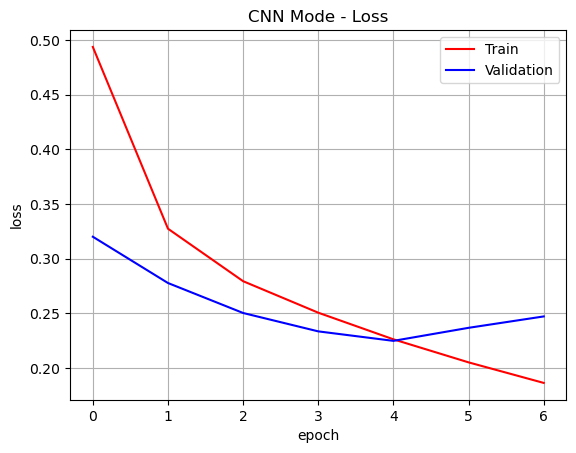

In [16]:
loss1 = h.history['loss']
loss2 = h.history['val_loss']

acc1 = h.history['accuracy']
acc2 = h.history['val_accuracy']

plt.figure()
plt.plot(loss1, c='red', label='Train')
plt.plot(loss2, c='blue', label='Validation')
plt.title('CNN Mode - Loss')
plt.xlabel('epoch')
plt.ylabel('loss') # error
plt.grid(True)
plt.legend()
plt.show()

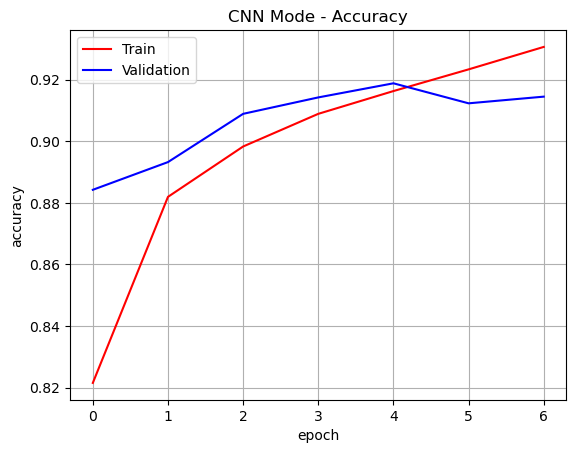

In [17]:
plt.figure()
plt.plot(acc1, c='red', label='Train')
plt.plot(acc2, c='blue', label='Validation')
plt.title('CNN Mode - Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy') # error
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# 모델 성능 평가
score = model.evaluate(x_test_scaled, y_test)
print('%.2f%%' % (score[1] * 100))

313/313 [==============================] - 6s 19ms/step - loss: 0.2485 - accuracy: 0.9075
90.75%


In [21]:
# 예측!
y_pred = model.predict(x_test_scaled[0:1])

print(np.argmax(y_pred, axis=1))

1/1 [==============================] - 0s 44ms/step
[9]


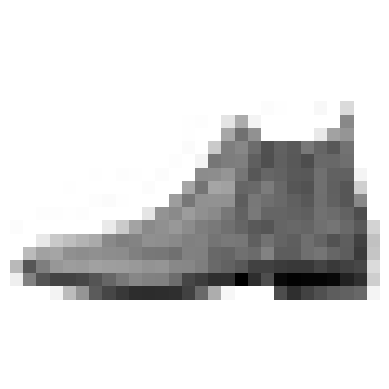

In [23]:
plt.figure()
plt.imshow(x_test_scaled[0:1].reshape(28, 28), cmap='gray_r')
plt.axis('off')
plt.show()

# Lecture 11. 합성곱 신경망의 시각화

# 01. 가중치 시각화

In [73]:
model = keras.models.load_model('best_model.h5')

In [74]:
model.layers

In [75]:
conv = model.layers[0]

In [76]:
print(conv.weights[0].shape) # 2-D, 가중치 (Weight)
print(conv.weights[1].shape) # 1-D, 편향 (Bias) <- y절편

(3, 3, 1, 32)
(32,)


In [77]:
conv_weights = conv.weights[0].numpy()

In [78]:
print(conv_weights.shape)

(3, 3, 1, 32)


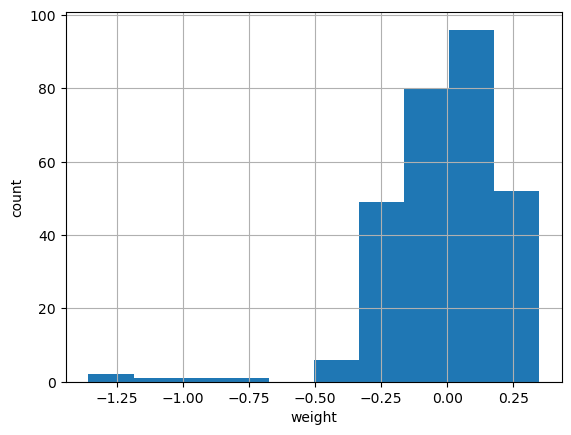

In [79]:
plt.figure()
plt.hist(conv_weights.reshape(288, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.grid(True)
plt.show()

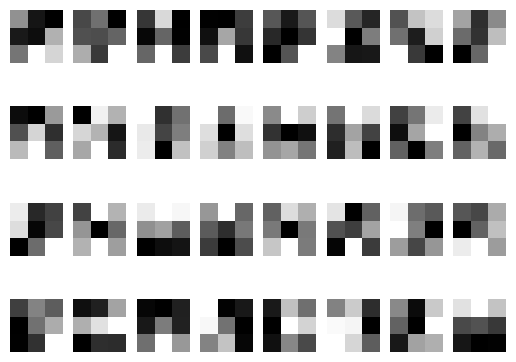

In [80]:
# (3, 3, 1, 32)

plt.figure()

for idx in range(32):
    plt.subplot(4, 8, (idx+1))
    plt.imshow(conv_weights[0:3, 0:3, 0, idx], cmap='gray_r') # vmin=0.5, vmax=0.5
    plt.axis('off')
    
plt.show()

In [81]:
no_model = keras.Sequential()
no_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu', padding='same',
                             input_shape=(28, 28, 1)))

In [82]:
no_conv = no_model.layers[0]

In [83]:
print(no_conv.weights[0].shape)

(3, 3, 1, 32)


In [84]:
no_conv_weight = no_conv.weights[0].numpy()

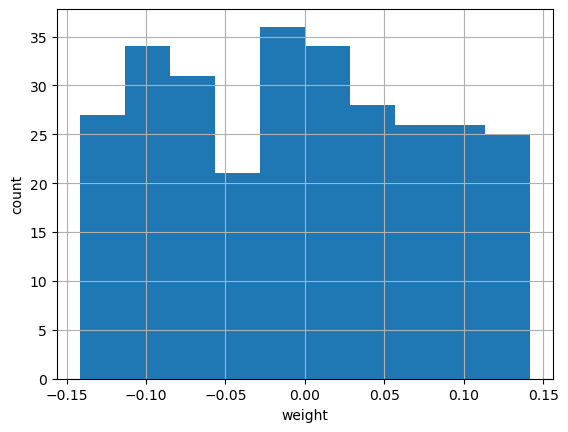

In [85]:
plt.figure()
plt.hist(no_conv_weight.reshape(288, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.grid(True)
plt.show()

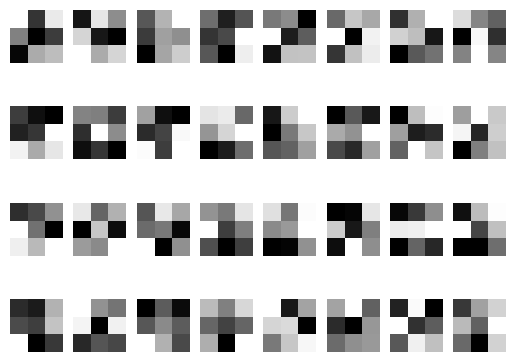

In [86]:
plt.figure()

for idx in range(32):
    plt.subplot(4, 8, (idx+1))
    plt.imshow(no_conv_weight[0:3, 0:3, 0, idx], cmap='gray_r') # vmin=0.5, vmax=0.5
    plt.axis('off')
    
plt.show()

# 특성 맵 시각화

In [56]:
dense1 = keras.layers.Dense(100, activation='relu') # 첫 번째 은닉층! (입력값이 전달)
 
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층!

In [58]:
inputs = keras.Input(shape=(784, ))

In [59]:
hidden = dense1(inputs)

In [60]:
outputs = dense2(hidden)

In [61]:
model2 = keras.Model(inputs, outputs)

# 실제 코딩은 아래서부터!

In [87]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [88]:
conv_acti = keras.Model(model.input, model.layers[0].output)

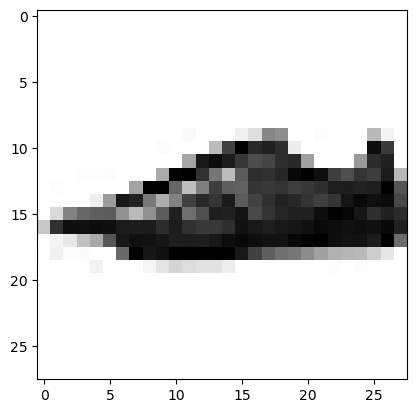

In [89]:
plt.figure()
plt.imshow(x_train_scaled[0], cmap='gray_r')
plt.show()

1/1 [==============================] - 0s 19ms/step
(28, 28, 1, 32)


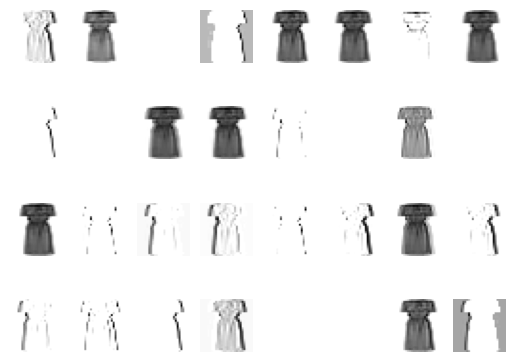

In [96]:
inputs = x_train_scaled[10] # 인덱스마다 사진이 다르다

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

plt.figure()

for idx in range(32):
    plt.subplot(4, 8, (idx+1))
    plt.imshow(feature_maps[0:28, 0:28, 0, idx], cmap='gray_r') # vmin=0.5, vmax=0.5
    plt.axis('off')
    
plt.show()